In [1]:
import numpy as np

In [12]:
X = 2*np.random.rand(100,1)

In [13]:
y = 4 + 3*X + np.random.randn(100,1)

In [14]:
X_b = np.c_[np.ones((100,1)), X]

In [15]:
theta_cap = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
theta_cap

array([[ 4.21213165],
       [ 2.77451259]])

In [17]:
X_new = np.array([[0],[2]])

In [18]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [19]:
X_new_predict = X_new_b.dot(theta_cap)

In [20]:
X_new_predict

array([[ 4.21213165],
       [ 9.76115684]])

In [22]:
import matplotlib.pyplot as plt

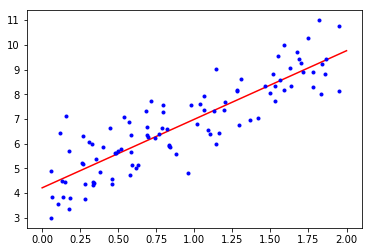

In [23]:
plt.plot(X_new,X_new_predict,'r-')
plt.plot(X,y,'b.')

In [24]:
from sklearn.linear_model import LinearRegression 

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lin_reg.intercept_

array([ 4.21213165])

In [28]:
lin_reg.coef_

array([[ 2.77451259]])

In [29]:
lin_reg.predict(X_new)

array([[ 4.21213165],
       [ 9.76115684]])

In [40]:
eta = 0.1
n_iter =1000
theta = np.random.randn(2,1)
m=100

In [41]:
for i in range(n_iter):
    grad = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*grad

In [42]:
theta

array([[ 4.21213165],
       [ 2.77451259]])

In [91]:
epochs = 100
t0 , t1 = 5 , 50
theta = np.random.randn(2,1)
def learning_schedule(t):
    return t0/(t+t1)
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(100)
        X_index = X_b[random_index:random_index+1]
        y_index = y[random_index:random_index+1]
        eta = learning_schedule(m*epoch + i)
        grad = 2*X_index.T*(X_index.dot(theta)-y_index)
        theta = theta - eta*grad
    


In [72]:
A = np.array([[1 ,2],[4,5]])

In [80]:
a = A[0:1]

In [90]:
b = np.array([[2]])
b.shape
a.T*(b)

array([[2],
       [4]])

In [75]:
100*np.random.rand()

68.77059888676492

In [92]:
theta

array([[ 4.19597302],
       [ 2.79097834]])

In [93]:
from sklearn.linear_model import SGDRegressor

In [95]:
sgd_reg = SGDRegressor(n_iter =50, penalty=None, eta0 = 0.1)

In [98]:
sgd_reg.fit(X,y)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [99]:
sgd_reg.intercept_

array([ 4.19425568])

In [100]:
sgd_reg.coef_

array([ 2.75318913])

In [101]:
m=100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

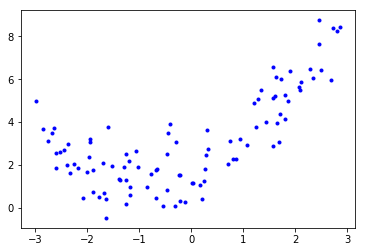

In [104]:
plt.plot(X,y,'b.')

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
poly_feat = PolynomialFeatures(degree=2,include_bias = False)

In [111]:
X_poly = poly_feat.fit_transform(X)

In [118]:
X_poly[0]

array([ 1.25354606,  1.57137773])

In [117]:
X[0]

array([ 1.25354606])

In [119]:
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
lin_reg.intercept_

array([ 1.75600808])

In [121]:
lin_reg.coef_

array([[ 0.92224075,  0.51338788]])

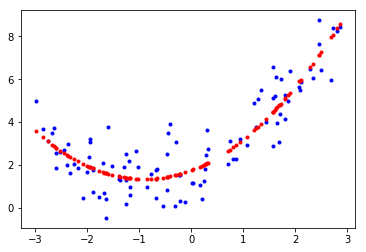

In [123]:
plt.plot(X,y,"b.")
plt.plot(X,lin_reg.predict(X_poly),'r.')
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [138]:
def plot_learning_curve(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    error_train = []
    error_val = []
    for i in range(1,len(X_train)):
        X_new = X_train[:i]
        y_new = y_train[:i]
        model.fit(X_new,y_new)
        error_train.append(mean_squared_error(y_new,model.predict(X_new)))
        error_val.append(mean_squared_error(y_test,model.predict(X_test)))
    plt.plot(np.sqrt(error_train),'r-+',linewidth =2,label ="Training Set")
    plt.plot(np.sqrt(error_val),'b-',linewidth = 2,label = "Cross-Validation Set")
    plt.axis([0,80,0,3])
    plt.show()


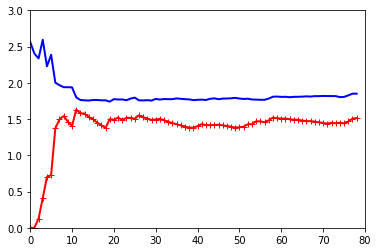

In [139]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

In [140]:
from sklearn.pipeline import Pipeline

In [141]:
ploy_regression = Pipeline((("poly_features ",PolynomialFeatures(degree=10,include_bias =False)),("lin_reg ",LinearRegression())))

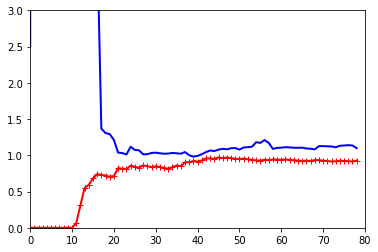

In [142]:
plot_learning_curve(ploy_regression,X,y)

In [143]:
from sklearn.linear_model import Ridge

In [144]:
ridge_reg = Ridge(alpha =1, solver = "cholesky")

In [145]:
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [146]:
ridge_reg.intercept_,ridge_reg.coef_

(array([ 3.1885435]), array([[ 0.86259621]]))

In [147]:
ridge_reg.predict([[1.5]])

array([[ 4.48243782]])

In [160]:
sgd_reg = SGDRegressor(penalty ="l1")

In [161]:
sgd_reg.fit(X,y)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [162]:
sgd_reg.predict([[1.5]])

array([ 3.54711197])

In [163]:
from sklearn.linear_model import Lasso

In [168]:
lasso_reg = Lasso(alpha=0.1)

In [169]:
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [170]:
lasso_reg.predict([[1.5]])

array([ 4.42782607])

In [171]:
from sklearn.linear_model import ElasticNet

In [172]:
elastic_net_reg = ElasticNet(alpha = 0.1, l1_ratio =0.5)

In [173]:
elastic_net_reg.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
elastic_net_reg.predict([[1.5]])

array([ 4.43282367])

In [176]:
X_train, X_val, y_train, y_val =train_test_split(X,y,test_size =0.2)

In [177]:
from sklearn.base import clone

In [178]:
sgd_reg = SGDRegressor(penalty =None, warm_start = True,alpha =0.0005,n_iter =1,learning_rate = 'constant')

In [181]:
poly_features = PolynomialFeatures(degree =10,include_bias =False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_val = poly_features.fit_transform(X_val)
min_val_error = float("inf")
best_epoch = None
best_model = None

In [183]:
for epoch in range(1000):
    sgd_reg.fit(X_poly_train,y_train)
    val_error = mean_squared_error(y_val,sgd_reg.predict(X_poly_val))
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/skle

/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/shruti/ml/env/lib/python3.5/site-packages/skle

In [184]:
best_epoch

712

In [185]:
from sklearn import datasets

In [186]:
iris = datasets.load_iris()

In [187]:
list(iris.keys())

['feature_names', 'target_names', 'target', 'DESCR', 'data']

In [189]:
iris['data']

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [190]:
X = iris['data'][:,3:]

In [191]:
y = (iris['target']==2).astype(np.int)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
log_reg = LogisticRegression()

In [194]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [196]:
y_proba = log_reg.predict_proba(X_new)

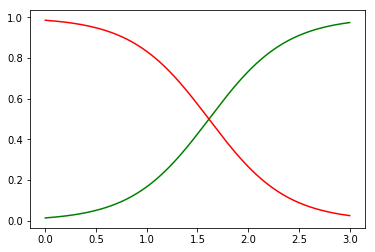

In [197]:
plt.plot(X_new,y_proba[:,1],"g-",label ="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"r-",label = "Non-Iris-Virginica")
plt.show()

In [198]:
X=iris["data"]

In [199]:
y = iris["target"]

In [200]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [201]:
softmax_reg = LogisticRegression(multi_class = "multinomial",solver ="lbfgs",C=10)

In [202]:
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
softmax_reg.predict([[5 ,2 ,6,3]])

array([2])

In [204]:
softmax_reg.predict_proba([[5,2,6,3]])

array([[  8.85937268e-15,   1.08649192e-08,   9.99999989e-01]])

In [208]:
y_new = np.zeros((len(y),3))

In [224]:
for i in range(len(y)):
    y_new[i,y[i]]=1
X_new=np.c_[np.ones((len(X),1)),X] 

In [228]:
y_new.shape


(150, 3)

In [227]:
X_train, X_val, y_train, y_val = train_test_split(X_new,y_new,test_size = 0.2)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 150]

In [27]:
theta =np.random.randn(np.shape(X)[1],3)

In [26]:
theta.shape

(5, 3)

In [226]:
X_train

array([[ 1. ,  6.7,  3.1,  4.7,  1.5],
       [ 1. ,  6.7,  3.3,  5.7,  2.1],
       [ 1. ,  6.7,  3.1,  4.4,  1.4],
       [ 1. ,  5.3,  3.7,  1.5,  0.2],
       [ 1. ,  4.8,  3.1,  1.6,  0.2],
       [ 1. ,  4.7,  3.2,  1.3,  0.2],
       [ 1. ,  6.4,  2.9,  4.3,  1.3],
       [ 1. ,  5.8,  2.6,  4. ,  1.2],
       [ 1. ,  7.2,  3. ,  5.8,  1.6],
       [ 1. ,  6.1,  2.8,  4. ,  1.3],
       [ 1. ,  5.1,  3.8,  1.9,  0.4],
       [ 1. ,  6.3,  2.9,  5.6,  1.8],
       [ 1. ,  6.8,  2.8,  4.8,  1.4],
       [ 1. ,  5. ,  2.3,  3.3,  1. ],
       [ 1. ,  7.9,  3.8,  6.4,  2. ],
       [ 1. ,  6. ,  3.4,  4.5,  1.6],
       [ 1. ,  5.6,  2.9,  3.6,  1.3],
       [ 1. ,  4.9,  2.5,  4.5,  1.7],
       [ 1. ,  4.3,  3. ,  1.1,  0.1],
       [ 1. ,  6. ,  2.7,  5.1,  1.6],
       [ 1. ,  5.1,  2.5,  3. ,  1.1],
       [ 1. ,  4.4,  3.2,  1.3,  0.2],
       [ 1. ,  4.7,  3.2,  1.6,  0.2],
       [ 1. ,  5.7,  2.8,  4.5,  1.3],
       [ 1. ,  5.1,  3.8,  1.5,  0.3],
       [ 1. ,  7.2,  3.6,

In [223]:
minimum_val_error = float("inf")
best_epoch =None
best_model =None
eta =0.0005
def batch_softmax_reg(X_train,y_train,theta):
    for i in range(1000):
        grad =1/m* X.T.dot(X_train.dot(theta) - y)
        theta = theta - eta*grad
    return theta

In [1]:
for epoch in range(1000):
    theta = batch_softmax_reg(X_train,y_train,theta)

NameError: name 'batch_softmax_reg' is not defined

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris["data"]

In [5]:
y = iris["target"]

In [7]:
import numpy as np
X = np.c_[np.ones((X.shape[0],1)),X]

In [8]:
X.shape

(150, 5)

In [10]:
y_new = np.zeros((len(y),3))
len(y)

150

In [11]:
for i in range(len(y)):
    y_new[i,y[i]]=1


In [12]:
y = y_new

In [13]:
y

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [85]:
from sklearn.model_selection import train_test_split
X_train , X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
eta = 0.0005
minimum_val_error = float("inf")
best_epoch = None
best_model = None
theta = np.random.randn(np.shape(X)[1],3)
def batch_predict(X_b,theta_b):
    X_c= np.exp(X_b.dot(theta_b))
    for f in range(X_c.shape[0]):
        X_c[f,:]=X_c[f,:]/sum(X_c[f,:])
    return X_c
def batch_softmax_reg (X , y , theta):
    for i in range(1000):
        grad =1/150* X.T.dot(X_train.dot(theta) - y)
        theta = theta - eta*grad
    return theta
def error(y_real,y_pred):
    return sum(sum(-np.log(y_pred)*y_real))/(y_real.shape[0])
for epoch in range(10000):
    theta = batch_softmax_reg(X_train,y_train,theta) 
    y_pred = batch_predict(X_val,theta)
    #print(y_pred)
    val_error = error(y_val,y_pred)
    #print(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = theta.copy()

In [21]:
A = np.array([[1,2],[3,4]])
sum(sum(np.log(A)))
B = A.copy()
A[1][1]=5
B

array([[1, 2],
       [3, 4]])

In [86]:
best_epoch

8955